# 生成高斯掩膜

In [1]:
import numpy as np
import math
import cv2 as cv

In [25]:
def generateGaussMask(x0,y0,sigma):
    mask = []
    h = y0
    w = x0
    center_h = (h-1)/2
    center_w = (w-1)/2
    a=0
    for i in range(h):
        y = pow(i - center_h,2)
        for j in range(w):
            x = pow(j-center_w,2)
            g = math.exp(-(x+y)/(2*sigma*sigma))
            mask.append(g)
            a += g
    return a,mask
    

In [30]:
 _,mask=generateGaussMask(3,3,0.8)
a,_= generateGaussMask(3,3,0.8)
print(a)
mask  =np.array(mask)
print(mask)
print(mask/a)

3.6697789956908493
[0.20961139 0.45783336 0.20961139 0.45783336 1.         0.45783336
 0.20961139 0.45783336 0.20961139]
[0.05711826 0.12475775 0.05711826 0.12475775 0.27249597 0.12475775
 0.05711826 0.12475775 0.05711826]


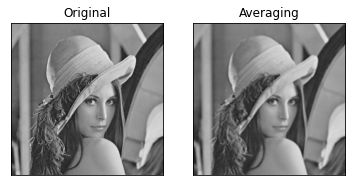

In [33]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('D:/Mechine_learning_data/lena512.bmp')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

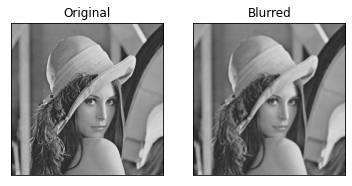

In [34]:
img = cv.imread('D:/Mechine_learning_data/lena512.bmp')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

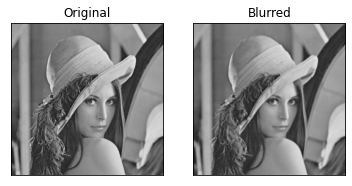

In [35]:
img = cv.imread('D:/Mechine_learning_data/lena512.bmp')
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 给图像添加噪声

In [38]:
import random
def sp_noise(image,prob):
    '''
    添加椒盐噪声
    prob:噪声比例 
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


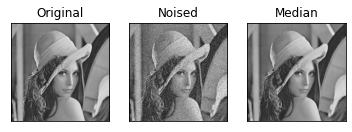

In [44]:
src1 = sp_noise(img,0.05)
median = cv.medianBlur(src1,5)
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(src1),plt.title('Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()


In [45]:
def gasuss_noise(image, mean=0, var=0.001):
    ''' 
        添加高斯噪声
        mean : 均值 
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    #cv.imshow("gasuss", out)
    return out

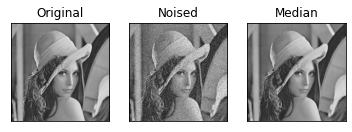

In [46]:
src2 = gasuss_noise(img,0.05)
median = cv.medianBlur(src1,5)
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(src1),plt.title('Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

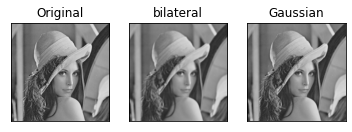

In [50]:
img = cv.imread('D:/Mechine_learning_data/lena512.bmp')
blur = cv.bilateralFilter(img,9,500,500)
blur1 = cv.GaussianBlur(img,(5,5),0)
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('bilateral')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur1),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()